In [1]:
import os
import sys
%load_ext autoreload


# Check if running in Google Colab
if 'model' not in os.listdir():
    if 'google.colab' in str(get_ipython()):
        !git clone -b dev https://github.com/kilometersvi/EnergySymbolicRegression.git
        os.chdir("/content/EnergySymbolicRegression/src/energysymbolicregression/")
    else:
        os.chdir('../')

    sys.path.append(os.getcwd())
elif 'google.colab' in str(get_ipython()):
    o = !git pull
    if "Already up to date." in o:
        %autoreload now


Cloning into 'EnergySymbolicRegression'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 53 (delta 21), reused 39 (delta 12), pack-reused 0
Receiving objects: 100% (53/53), 429.22 KiB | 16.51 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
import numpy as np
import re
import math
from model.symreg import H_SymReg
from model.optimizer import *
from model.loss import EvaluatorBase
from model.qfuncts import math_qfuncs, math_ifuncs
import matplotlib.pyplot as plt

In [3]:
def cleanfunct(V: np.ndarray = None, expr: str = None) -> str:

    if expr is not None:
        # Replace sequences of zeros with a single zero
        expr = re.sub(r'(^0+|(?<=[+\-/*])0+)(?=$|[+\-/*x1-9])', '0', expr)

        # Remove unnecessary leading zeros from numbers
        expr = re.sub(r'^|(?<=[+\-/*])(0+)(?=[1-9])', '', expr)

        # Remove empty char
        expr = expr.replace('N','')

        return expr

    return None


class MathEvaluator_ValueAt(EvaluatorBase):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def forward(self, expr: str, globals: dict = None, locals: dict = None) -> str:
        # 5x -> (5 * x)
        c_eq = re.sub(r'(\d+)x', r'(\1 * x)', expr)

        local_vars = {"x": self.x, "math": math}
        try:
            y_o = eval(c_eq, {}, local_vars)
        except Exception as e:
            #print(f"{c_iter}: Failed to evaluate expression {c_eq}. Error: {e}.")
            return None, self.y

        return y_o, self.y




0: NNNNNNNNNN
4: NNNNNNNNNN
8: NNNNNNNNNN
12: NNNNNNNNNN
16: NNNNNNNNNN
20: NNNNxNNNNN
24: NNNNxNNNNN
28: NNNNx+NNNN
32: NNNNxNNNNN
36: NNNNxNNN1N
40: NNNNx+7/NN
44: NNNNx+N/NN
48: NNNNx+N/NN
52: NNNNx+N/NN
56: NNNNx+N/3N
60: NNNNx+N/3N
64: NNNNx+N/1N
68: NNNNx+7/3N
72: NNNNx+7/3N
76: NNNNx+7/3N
80: NNNNx+7/3x
84: NNNNx+7/3x
88: NNNNx+7/3x
92: NNNNx+7/3x
96: NNNNx+7/3x
100: NNNNx+7/3x
104: NNNNx+7/3x
108: NNNNx+7/3x
112: NNNNx+7/3x
116: NNNNx+7/3x
120: NNNNx+7/3x
124: NNNNx+7/3x
128: NNNNx+7/3x
132: NNNNx+7/3x
136: NNNNx+7/3x
140: NNNNx+7/3x
144: NNNNx+7/3x
148: NNNNx+7/3x
152: NNNNx+7/3x
156: NNNNx+7/3x
160: NNNNx+7/3x
164: NNNNx+7/3x
168: NNNNx+7/3x
172: NNNNx+7/3x
176: NNNNx+7/3x
180: NNNNx+7/3x
184: NNNNx+7/3x
188: NNNNx+7/3x
192: NNNNx+7/3x
196: NNNNx+7/3x
200: NNNNx+7/3x
204: NNNNx+7/3x
208: NNNNx+7/3x
212: NNNNx+7/3x
216: NNNNx+7/3x
220: NNNNx+7/3x
224: NNNNx+7/3x
228: NNNNx+7/3x
232: NNNNx+7/3x
236: NNNNx+7/3x
240: NNNNx+7/3x
244: NNNNx+7/3x
248: NNNNx+7/3x
252: NNNNx+7/3x
256:

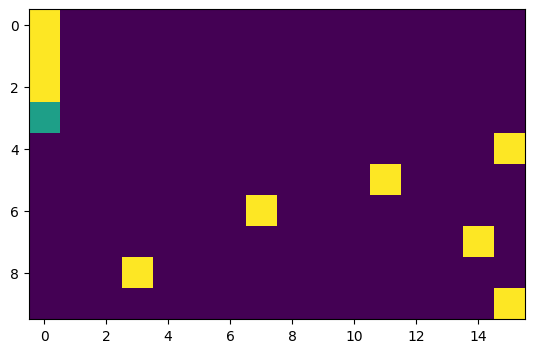

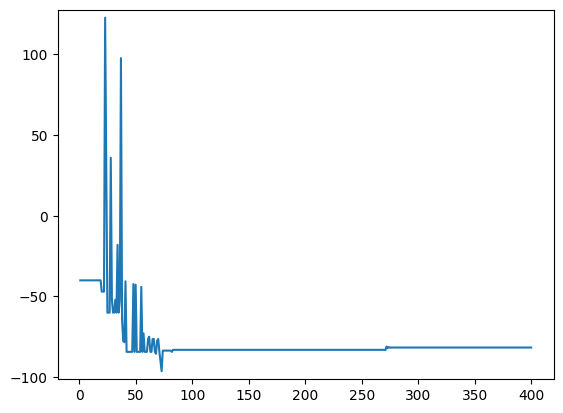

In [4]:
chars = ['N','1','2','3','4','5','6','7','8','9','0','+','-','*','/','x']
max_str_len = 10
conf = {
    "c":-20,
    "ofo":-10,
    "ose":-10,
    "nfn":-0.5,
    "NfNd":7,#
    "Nsd":1,
    "nfx":-10,
    "x":1,
    "xm":-2,
    "Nf!N":-10,
    "Ne":-5,
    "Ns":5,#
    "xfx":-10
}
sets = {
    "operators":[c for c in chars if re.match(r'[^0-9Nxy]', c)],
    "numbers":[c for c in chars if re.match(r'[0-9]', c)]
}

qfuncs = math_qfuncs
ifuncts = math_ifuncs

evaluator = MathEvaluator_ValueAt(2, 20)
eval_clip = 400


    # Compute the loss
    #loss_fn.set_tokenstring_preprocess_function(c)
optimizer = None#MaskedLossOptimizer(std_width = 2, decrease_loss_scaler = 2)


my_sr = H_SymReg(chars=chars, max_str_len=max_str_len, conf=conf, sets=sets, Ifuncts = ifuncts, Qfuncts = qfuncs,
                 evaluator = evaluator, optimizer = optimizer, cleanfunct = cleanfunct, eval_clip=eval_clip, min_energy_for_eval=-80, gain=999, dt=0.01)
my_sr.update(n_iters=400, min_dE=0.01, min_E=-300)

y_o, y_t = my_sr.evaluator(my_sr.decode_output())


print(f"generated: {my_sr.decode_output()} = {y_o} (y_true: {y_t}, full: {my_sr.decode_output(clean=False)}) ")
print(f"energy: {my_sr.E_hist[-1]}")
#print(f"loss: {my_sr.get_evalloss()}")
print(f"{len(my_sr.E_hist)} iters")
my_sr.plot_results()
my_sr.plot_Ehist(max_y=300)



In [ ]:
print(my_sr.decode_output(my_sr.V_extremes[0], clean=False))
print(my_sr.decode_output(my_sr.V_extremes[1], clean=False))


error saving video: 'FuncAnimation' object has no attribute 'FFMpegWriter'


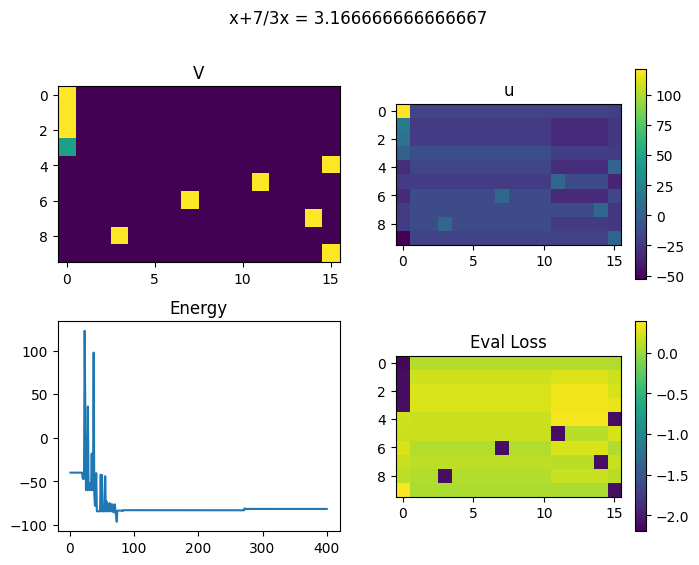

In [5]:
my_sr.plot_histories_as_video()

In [ ]:
#q landscape
a = my_sr.qfactory.averages()
a_chars = np.mean(a,axis=1)
a_posses = np.mean(a,axis=0)

print("average inhibition across output positions, of all chars: ")
for i, p in zip(range(max_str_len), a_posses):
    print(f'\t{i}, {p:.3}')
print(f"average inhibition across characters, of all pos: ")
for i, p in zip(chars, a_chars):
    print(f'\t{i}, {p:.3}')

plt.imshow(a)
plt.show()

In [ ]:
my_sr.qfactory.plot()